# Hello, world

I'm some [Markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)! 

I can render math with [MathJax](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html): $\tau > \pi$

In [5]:
print(f"I'm some Python code. I can calculate! {1+1=}")

I'm some Python code. I can calculate! 1+1=2


I can show maps and plots:


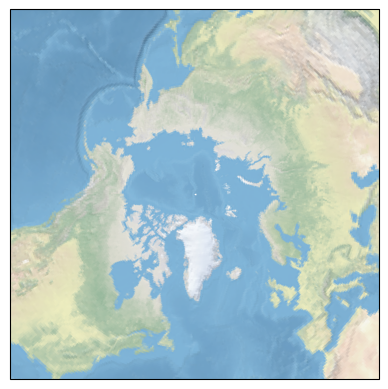

In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

print("I can show maps and plots:")

ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax.set_extent([-180, 180, 90, 40], crs=ccrs.PlateCarree())
ax.stock_img()

# TODO: plot some geojson?

plt.show()

## TODO

* Maybe programmatically generate a random distribution of points over an
  area in Greenland (e.g. use the extent of "Greenland coastlines 2017" layer as the
  x/y extents for random-number generation, then filter those random coordinates
  using the "Greenland coastlines 2017" layer).
* Maybe filter the "Place names database" layer by:
    * Random sample
    * Maximum of a particular attribute
